# Machine Learning I: Introducción a los Métodos de Clasificación Supervisada

CONCEPTOS

## PARTE 1: Un enfoque práctico del Machine Learning

1. Acerca del software

    1.1 Integración en el ecosistema de Python

2. ¿Qué es el Machine Learning?

3. Modelando el problema de Machine Learning

4. El problema de la clasificación supervisada. Un ejemplo básico guiado programáticamente

    4.1 Representando el problema en sklearn
    
    4.2 Aprendiendo y prediciendo
    
    4.3 Más sobre los datos: The feature space
    
    4.4 Train y Test
    
    4.5 Selección de modelo (I)

## PARTE 2: Conceptos de aprendizaje y teoría

5. ¿Qué es aprender?

    * Aprendizaje PAC
      
6. Dentro del modelo de aprendizaje

    * El algoritmo de Machine Learning humano
    * Clase de modelo y espacio de hipótesis
    * Función objetivo
    * Búsqueda/Optimización/Algoritmo de aprendizaje
    
7. Curvas de aprendizaje y sobreajuste

    * Curvas de aprendizaje
    * Sobreajuste
        
8. Curas para el sobreajuste

    * Selección de modelo (II)
    * Regularización
    * Conjunto

## PARTE 3: Primeros modelos

9. Modelos generativos y discriminativos

    9.1 Modelos Bayesianos (Naive Bayes) y algunas aplicaciones
    
    9.2 Máquinas de Soporte Vectorial (Support Vector Machines)

# PARTE 1: Un enfoque práctico del Machine Learning

## 1. Acerca del software
### Scikit-Learn

+ Scikit-Learn es una biblioteca de aprendizaje automático escrita en Python.
+ Simple y eficiente, tanto para expertos como para no expertos.
+ Algoritmos de aprendizaje automático clásicos y bien establecidos.
+ Licencia BSD 3.

### 1.1 Integración en el ecosistema científico de Python

El ecosistema de código abierto de Python proporciona un entorno de trabajo científico versátil y potente, que incluye:

+ NumPy (para la manipulación eficiente de arrays multidimensionales);
+ SciPy (para estructuras de datos especializadas (por ejemplo, matrices dispersas) y algoritmos científicos de bajo nivel),
+ IPython (para exploración interactiva),
+ Matplotlib (para visualización)
+ Pandas (para la gestión y análisis de datos)
+ (y muchos otros...)

Scikit-Learn se basa en NumPy y SciPy y complementa este entorno científico con algoritmos de aprendizaje automático; por diseño, Scikit-Learn es no intrusivo, fácil de usar y fácil de combinar con otras bibliotecas. Usaremos Scikit-Learn como herramienta para entender el aprendizaje automático.

## 2. ¿Qué es el Machine Learning?

El **Aprendizaje Automático** (ML) se trata de codificar programas que ajustan automáticamente su rendimiento a partir de la exposición a la información codificada en los datos. Este aprendizaje se logra mediante un modelo parametrizado con parámetros ajustables automáticamente según un criterio de rendimiento.

El aprendizaje automático puede considerarse un subcampo de la Inteligencia Artificial (IA).

Hay tres clases principales de ML:

   1. Aprendizaje supervisado: Algoritmos que aprenden de un conjunto de entrenamiento de ejemplos etiquetados (ejemplares) para generalizar al conjunto de todas las entradas posibles. Ejemplos de técnicas en aprendizaje supervisado incluyen la regresión y las máquinas de vectores de soporte.
    
   2. Aprendizaje no supervisado: Algoritmos que aprenden de un conjunto de entrenamiento de ejemplos no etiquetados, utilizando las características de las entradas para categorizar las entradas juntas según algún criterio estadístico. Ejemplos de aprendizaje no supervisado incluyen el agrupamiento k-means y la estimación de densidad kernel.
    
   3. Aprendizaje por refuerzo: Algoritmos que aprenden mediante refuerzo de un crítico que proporciona información sobre la calidad de una solución, pero no sobre cómo mejorarla. Las soluciones mejoradas se logran explorando iterativamente el espacio de soluciones. No cubriremos RL en este curso.
   
## 3. Modelando el problema del Machine Learning

El primer paso para aplicar la ciencia de datos y el aprendizaje automático es identificar una pregunta interesante para responder. Según el tipo de respuesta que buscamos, estamos apuntando directamente a un conjunto de técnicas.

+ Si nuestra pregunta se responde con *SÍ/NO*, estamos frente a un problema de **clasificación**. Los clasificadores también son las técnicas a usar si nuestra pregunta admite solo un conjunto discreto de respuestas, es decir, queremos seleccionar entre un número finito de opciones.

    + Dado un perfil de cliente y actividad pasada, ¿cuáles son los productos financieros que más le interesarían?
    
    + Dados los resultados de una prueba clínica, ¿este paciente sufre de diabetes?
    
    + Dada una imagen de resonancia magnética, ¿hay un tumor en ella?
    
    + Dada la actividad pasada asociada a una tarjeta de crédito, ¿es la operación actual un fraude?
    
    + Dadas mis habilidades y calificaciones en informática y matemáticas, ¿aprobaré el curso de ciencia de datos?

+ Si nuestra pregunta es una predicción de una cantidad (generalmente de valor real), estamos frente a un problema de **regresión**.

    + Dada la descripción de un apartamento, ¿cuál es el valor de mercado esperado del piso? ¿Cuál sería el valor si el apartamento tiene ascensor?
    
    + Dados los registros pasados de actividades de usuario en aplicaciones, ¿cuánto tiempo estará un cliente determinado enganchado a nuestra aplicación?
    
    + Dadas mis habilidades y calificaciones en informática y matemáticas, ¿qué calificación lograré?
    
    
Observe que algunos problemas pueden resolverse usando tanto regresión como clasificación. Como veremos más adelante, muchos algoritmos de clasificación son regresores con umbral. Hay cierta habilidad en diseñar la pregunta correcta y esto cambia dramáticamente la solución que obtenemos.

**REGLA DE ORO:** Nuestro primer principio de diseño a tener en cuenta es que en general si un problema se puede resolver usando una pregunta más simple no use una más compleja. Esto es una instancia del famoso principio KISS (*¡Keep It Simple, Stupid!*).

**PREGUNTA:** ¿Cuál de las siguientes preguntas corresponde a un problema de classificación?

<li> ¿Qué tiempo hará mañana? 
<li> ¿Es normal este comportamiento?
<li> ¿Dónde están mis llaves en esta foto? 
</div>

## 4. El problema de la clasificación supervisada. Un ejemplo programático básico y guiado.

En un problema de clasificación supervisada, dado un conjunto de ejemplos con su correspondiente etiqueta, nuestro objetivo es predecir la pertenencia de una instancia dada a uno de un conjunto predefinido de clases discretas.

Formalmente, podemos describir el problema de la siguiente manera: Considere un conjunto *conjunto de entrenamiento* compuesto por $N$ pares de muestras de datos $\{(x_i,y_i)\}, \quad i =1,\dots,N$ donde $x_i \in {\bf R}^d$ está descrito por $d$ características, y su correspondiente etiqueta supervisada, por ejemplo, en el caso binario más simple $y_i = \{-1,1\}$. Nuestro objetivo es encontrar un modelo $h:{\bf R}^d \rightarrow {\bf R}$ tal que dado una nueva muestra de datos $x$ prediga correctamente su etiqueta $y$, es decir, $h(x) = y$.

En aprendizaje automático generalmente hablamos de dos pasos diferentes:

+ **Entrenamiento**. Dado un conjunto de instancias de datos $x$ y su correspondiente etiqueta $y$, queremos aprender/<span style="color:red">ajustar</span> un modelo.

+ **Prueba o explotación**. Dado un modelo queremos aplicarlo a nuevos datos no vistos para <span style="color:red">predecir</span> su etiqueta.

Consulte el siguiente ejemplo sobre cómo manejar el **entrenamiento básico** y la **persistencia**. Consideramos un problema visual para construir nuestra intuición sobre el proceso.

**El problema:** Considere el problema del reconocimiento de dígitos manuscritos. Dada una imagen de un dígito manuscrito, queremos construir un clasificador que reconozca la etiqueta correcta.

Comencemos cargando el conjunto de datos.

In [1]:
#Load data set.
from sklearn import datasets
digits = datasets.load_digits()

Ahora, verifica los datos que acabas de cargar.

In [2]:
#Check the data format.
X, y = digits.data, digits.target

print (X.shape)
print (y.shape)

(1797, 64)
(1797,)


### 4.1 Representando un problema de Machine Learning en Scikit-Learn

Recuerda la formalización del problema donde el conjunto de datos de entrenamiento consiste en $N$ pares de datos $S = \{(x_i,y_i)\},\; i = 1\dots N$ donde $x_i \in {\bf R}^d$ está compuesto por $d$ características/descriptores y $y_i \in \{1,\dots,K\}$ es una etiqueta de objetivo discreto. En nuestro problema actual, tenemos $N = 1797$ ejemplos de datos de números escritos a mano. Cada muestra es una imagen de $8\times 8$. La representación de cada muestra de datos está codificada en un vector. Por esta razón, aplanamos la imagen y la reorganizamos en un vector con $d=64$ correspondientes a los valores de gris/brillo de cada píxel de la imagen. $y_i$ es el valor de la clase objetivo a la que pertenece el número.

Visualicemos el primer dígito.

(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


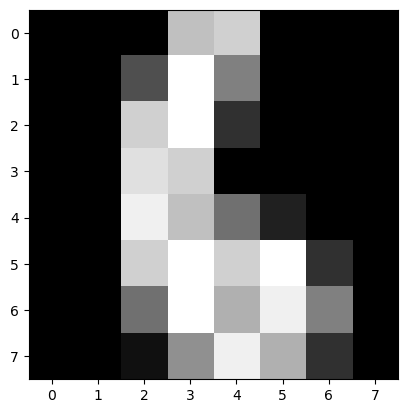

In [3]:
%matplotlib inline
# The original digit has been flattened, so we reshape it back to its original form
# Check the dimensionality of the data, e.g. the first element in the data set X[0]
print (X[0].shape)
print (X[0])

# Reshape it to 8x8 to recover the original image
print (X[0].reshape((8,8)))


# Show the image using scikit.image package
import matplotlib.pyplot as plt

plt.imshow(X[6].reshape((8,8)),cmap="gray",interpolation="nearest")

Veamos algunos de los ejemplos que tenemos en nuestro conjunto de datos.

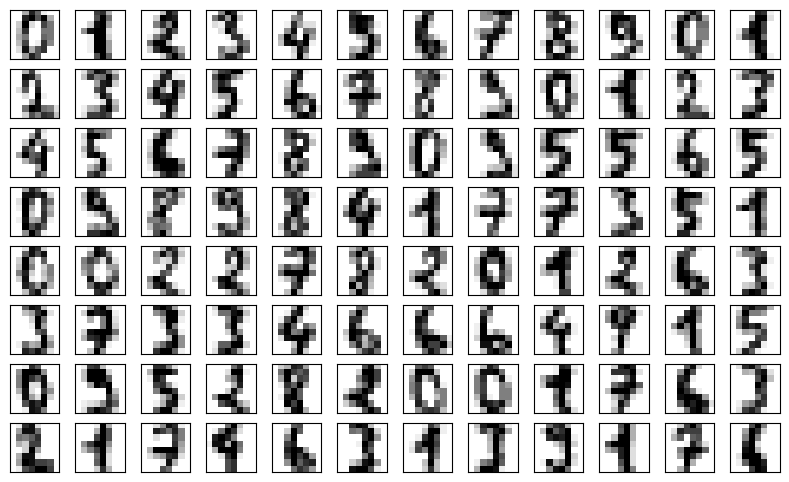

In [4]:
#Visualize some of the data.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(8, 12, subplot_kw={'xticks':[], 'yticks':[]})
for i in range(ax.size):
    ax.flat[i].imshow(digits.data[i].reshape(8, 8),
                      cmap=plt.cm.binary)
fig.set_size_inches((10,6))

Un problema en Scikit-Learn se modela de la siguiente manera:

+ Los datos de entrada están estructurados en arrays de Numpy. Se espera que el tamaño del array sea [n_samples, n_features]:

    + *n_samples*: El número de muestras ($N$): cada muestra es un elemento a procesar (por ejemplo, clasificar). Una muestra puede ser un documento, una imagen, un sonido, un video, un objeto astronómico, una fila en una base de datos o archivo CSV, o cualquier cosa que se pueda describir con un conjunto fijo de características cuantitativas.
  
    + *n_features*: El número de características ($d$) o rasgos distintos que pueden usarse para describir cada elemento de manera cuantitativa. Las características generalmente son valores reales, pero pueden ser booleanos, valores discretos o incluso categóricos.

$${\rm matriz~de~características:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1d}\\
x_{21} & x_{22} & \cdots & x_{2d}\\
x_{31} & x_{32} & \cdots & x_{3d}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{Nd}\\
\end{matrix}
\right]$$

$${\rm vector~de~etiquetas:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]$$
    

El número de características debe fijarse de antemano. Sin embargo, puede ser de muy alta dimensionalidad (por ejemplo, millones de características) con la mayoría de ellas siendo ceros para una muestra dada.

**Ejemplo** *Considere una representación de documento de texto. Dado un documento de texto, queremos construir una representación para él. En este caso, podríamos usar como descripción del documento un diccionario con todas las palabras posibles en nuestro idioma y crear una descripción del documento como el número de veces que cierta palabra aparece en el documento. Cada documento es una muestra y cada valor que cuenta el número de veces que una palabra aparece en el texto es una característica. Observe que un solo documento usará solo un puñado de palabras. Por lo tanto, hay muchas palabras que no se utilizan y su representación será cero. Este es un caso donde las matrices scipy.sparse pueden ser útiles, ya que son mucho más eficientes en términos de memoria que los arrays de numpy.*

#### Jerga del conjunto de datos

Considerando los datos organizados como en la sección anterior, nos referimos a:

+ las **columnas** como características, atributos, dimensiones, regresores, covariables, predictores, variables independientes,
+ las **filas** como instancias, ejemplos, muestras.
+ el **objetivo** como etiqueta, resultado, respuesta, variable dependiente.

**PREGUNTA:** Consideremos el siguiente problema: *Nos piden desarrollar un producto similar a Shazzam(tm). Esto es, reconocer el nombre de una canción dada una pequeña muestra de la música.*.
<p>
Discuta y describa con su compañero un posible vector de características para este problema.
</div>

### 4.2 Aprendizaje y predicción con Scikit-Learn

Todos los objetos en scikit-learn comparten una API uniforme y limitada que consiste en tres interfaces complementarias:

+ una interfaz de estimador para construir y ajustar modelos (.fit());
+ una interfaz de predictor para hacer predicciones (.predict());
+ una interfaz de transformador para convertir datos.

Elijamos un modelo y ajustemos los datos de entrenamiento:

In [5]:
#Train a classifier using .fit()
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

[KNN explained](https://www.youtube.com/watch?v=HVXime0nQeI&ab_channel=StatQuestwithJoshStarmer)

In [6]:
#Save the model to disk (it can alternatively be stored in a string)
import pickle
ofname = open('my_classifier.pkl', 'wb')
s = pickle.dump(knn,ofname)
ofname.close()
print (s)

#Clear the namespace
%reset -f

None


In [8]:
#Check we don't have the variable in the namespace. This should give a NameError
# print(knn)

Now let us do some **exploitation** of the model. In this example we use the same data but in general new and unseen data is to be provided to the trained classifier.

In [7]:
from sklearn import neighbors
from sklearn import datasets
import pickle
ofname = open('/Users/gabrielrogetdeaysa/Library/CloudStorage/GoogleDrive-rogetaysa@gmail.com/La meva unitat/IronhackGD/RepoIronhack/Sessions/45 46 47 48 - Data Analytics V/machine-learning-1/my_classifier.pkl','rb') #Open in binary format. You never know how it was saved.
digits = datasets.load_digits()
X = digits.data
knn = pickle.load(ofname)



In [8]:
#Compute the prediction according to the model
print(knn.predict(X[0,:].reshape(1, -1)))

[0]


In [9]:
#Check the target value.
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
# predicted model
y_pred=knn.predict(X)

Para evaluar el rendimiento del clasificador, se puede utilizar la precisión de las predicciones:
$$acc  = \frac{\mbox{# de predicciones correctas}}{N}$$

Cada estimador tiene un método *.score()* que invoca la métrica de puntuación predeterminada. En el caso de los k Vecinos Más Cercanos, esta es la precisión de clasificación.

In [ ]:
#Check the performance on the training set 
# - IF YOU KNOW WHAT YOU ARE DOING YOU WILL NEVER DO THIS AGAIN!
knn.score(X,y)

**EJERCICIO:** Pon todos los pasos en una misma celda y mira de ejecutarla.
</div>

In [ ]:
#EXERCISE#Fill this cell with the exercise solution.
from sklearn import datasets
data= datasets.load_digits()
X,y = data.data, data.target

from sklearn import neighbors
from sklearn import tree
## FILL THE REST

### 4.3 Más sobre los datos: The feature space

Cuando trabajamos con datos, especialmente en el aprendizaje automático, a menudo comenzamos con valores brutos. En nuestro caso, estamos tratando con imágenes de dígitos, y los valores brutos son los niveles de gris de cada píxel en estas imágenes. Para dar sentido a estos datos y potencialmente mejorar cómo distinguimos entre diferentes dígitos, podemos extraer o derivar nuevas características de los datos brutos. Estas características son atributos que calculamos a partir de los datos, basados en nuestra comprensión de lo que podría ser importante para identificar las diferencias entre clases (en este caso, diferentes tipos de dígitos).

#### Características Derivadas: Simetría y Área

Para el conjunto de datos de dígitos, consideramos tres características específicas que podrían ayudarnos a diferenciar entre dígitos:

- **Simetría Horizontal**: ¿Qué tan similar es la mitad izquierda de la imagen a la mitad derecha?
- **Simetría Vertical**: ¿Qué tan similar es la mitad superior de la imagen a la mitad inferior?
- **Área**: La suma de todos los valores de píxeles, que puede considerarse como el "peso" del dígito.

#### El Código Explicado

##### Visualizando la Simetría

Primero, vamos a observar un dígito y explorar su simetría:

In [ ]:
from skimage import io as io

# Reshape the 8th digit in the dataset to its original 8x8 form.
tmp = X[7].reshape((8,8))

# Visualize the original digit and its horizontal mirror.
io.imshow(tmp)
io.show()
io.imshow(tmp[:,::-1]) # This flips the image horizontally.
io.show()

Esta parte del código simplemente nos muestra la imagen original de un dígito y su versión volteada horizontalmente para darnos una intuición visual sobre la simetría.

**Cálculo de Nuevas Características:**

A continuación, calculamos las tres características (simetría horizontal, simetría vertical y área) para cada dígito en el conjunto de datos:

In [ ]:
import numpy as np

# Initialize an array to hold the new features for each image.
Xnew = np.zeros((y.shape[0],3))

for i in range(y.shape[0]):
    area = sum(X[i]) # Calculate the area feature.
    tmp = X[i].reshape((8,8))
    symH = tmp * tmp[:,::-1] # Calculate horizontal symmetry.
    symV = tmp * tmp[::-1,:] # Calculate vertical symmetry.
    
    # Store the calculated features.
    Xnew[i,:] = [sum(symH.flatten()), area, sum(symV.flatten())]

print(Xnew)
print(Xnew.shape)

In [ ]:
#Save this dataset for later use
import pickle
ofname = open('my_digits_data.pkl', 'wb')
s = pickle.dump([Xnew,y],ofname)
ofname.close()
print ('DONE')

Este script transforma cada imagen para calcular y almacenar nuestras tres características elegidas: las sumas de los productos de la imagen y sus espejos horizontales y verticales (para la simetría) y la suma de los valores de los píxeles (para el área).

**Visualización del Espacio de Características**
Finalmente, visualizamos cómo dos dígitos, 0 y 6, difieren en este nuevo espacio de características:

In [ ]:
import matplotlib.pyplot as plt

# Find indices of digits 0 and 6.
idxA = y==0
idxB = y==6

# Choose which features to plot.
feature1 = 1
feature2 = 2

# Plot the features for digits 0 and 6.
plt.figure()
plt.scatter(Xnew[idxA, feature1], Xnew[idxA, feature2], c='blue', alpha=0.2)
plt.scatter(Xnew[idxB, feature1], Xnew[idxB, feature2], c='red', alpha=0.2)
plt.show()

Esta sección crea un gráfico de dispersión para comparar visualmente las características seleccionadas para los dígitos 0 y 6. El gráfico nos ayuda a ver si y cómo estos dígitos pueden distinguirse basándose en las nuevas características que hemos creado.

**Conclusión**
Al derivar nuevas características de los datos brutos, a menudo podemos descubrir patrones que nos ayudan a diferenciar entre clases de manera más efectiva.

El proceso de usar información del dominio del conocimiento para crear características discriminantes se llama <span style="color:red">extracción de características</span>.

### Datos Brutos vs. Extracción de Características

Cuando trabajamos con modelos de aprendizaje automático, a menudo encontramos dos enfoques principales para preparar nuestros datos: usar datos brutos directamente o extraer características de estos datos. Ambos enfoques tienen sus ventajas y desventajas, que son cruciales para entender para un desarrollo de modelo efectivo.

#### Datos Brutos

**Ventajas:**

- **Accesibilidad:** Los datos brutos se pueden usar directamente sin la necesidad de procesamiento o transformación adicionales. Este enfoque no requiere conocimiento específico del dominio, lo que lo hace sencillo y accesible para los practicantes en todos los niveles.

**Desventajas:**

- **Redundancia y Dimensionalidad:** Los datos brutos a menudo son altamente redundantes, conteniendo información que puede no ser necesaria para hacer predicciones o clasificaciones precisas. Esta redundancia típicamente resulta en espacios dimensionales muy grandes, lo que puede complicar el entrenamiento del modelo y llevar a tiempos de computación más largos.
- **Discriminabilidad Desconocida:** Con los datos brutos, no siempre está claro qué características son importantes para distinguir entre clases. Esta falta de claridad puede obstaculizar la capacidad de aprendizaje del modelo, ya que puede centrarse en características irrelevantes.

#### Extracción de Características

**Ventajas:**

- **Información Discriminante:** La extracción de características tiene como objetivo identificar y capturar la información más relevante en los datos para la tarea en cuestión. Al centrarse en la información discriminante, los modelos pueden lograr un mejor rendimiento con menos datos.
- **Dimensionalidad y Complejidad Reducidas:** A través de la extracción de características, los datos se transforman en un espacio de menor dimensión que refleja los aspectos más importantes de los datos originales. Esta reducción en la dimensionalidad y la complejidad puede llevar a tiempos de entrenamiento más rápidos y modelos más eficientes.

**Desventajas:**

- **Conocimiento del Dominio Requerido:** A diferencia del uso de datos brutos, la extracción de características a menudo requiere conocimiento específico del dominio para identificar qué características probablemente sean informativas. Este requisito puede hacer que la extracción de características sea menos accesible para aquellos sin experiencia en el dominio.

### Medición de rendimiento

Existen diferentes criterios para medir el rendimiento de un clasificador y la métrica más adecuada suele depender del problema. Cuando no se dispone de información previa sobre el problema, generalmente usamos la precisión de clasificación. Cuando estamos frente a un problema de clasificación múltiple (hay muchas clases para elegir) podemos usar la matriz de confusión. Los elementos de la matriz de confusión $M$ se definen de la siguiente manera,

$$M(i,j) = \mbox{# de muestras de la clase j predichas como clase i}$$

[matriz de confusión](https://www.youtube.com/watch?v=Kdsp6soqA7o&ab_channel=StatQuestwithJoshStarmer)

Verifiquemos estos valores:

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

def plot_confusion_matrix(y, y_pred):
    # Generate the confusion matrix
    cm = metrics.confusion_matrix(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    # Adding tick marks and labels for clarity
    classes = np.unique(y)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Adding text annotations to each cell in the confusion matrix
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example usage
# Assume y and y_pred are defined elsewhere in your code
print("Classification accuracy:", metrics.accuracy_score(y, y_pred))
plot_confusion_matrix(y, y_pred)
plt.show()

**PREGUNTA:** ¿Cuales son las clases con más confusión?
</div>

### 4.4 Train y Test 
#### Más intuición detrás del proceso de aprendizaje

Comprender el proceso de aprendizaje en el aprendizaje automático es crucial para aplicar efectivamente los modelos para resolver problemas. El fragmento de código a continuación demuestra cómo entrenar un clasificador de K Vecinos Más Cercanos (KNN) utilizando un conjunto de datos con características, hacer predicciones y evaluar el rendimiento del modelo. Este proceso es fundamental para el aprendizaje automático y proporciona información sobre cómo los modelos aprenden de los datos para hacer predicciones.

In [ ]:
from sklearn import neighbors

# Create an instance of the KNeighborsClassifier with 1 neighbor.
# This means the algorithm will consider the closest neighbor to make a prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# Train the classifier on the dataset.
# Here, Xnew represents the featurized version of the original data, and y represents the labels.
# The .fit() method is used to train the model using the provided features and labels.
knn.fit(Xnew, y)

# Make predictions on the dataset using the trained model.
# The .predict() method is applied to the featurized data Xnew, generating predictions yhat.
yhat = knn.predict(Xnew)

# Print the classification accuracy of the model.
# The accuracy_score function compares the predicted labels (yhat) with the true labels (y) to calculate the accuracy.
print("Classification accuracy:", metrics.accuracy_score(yhat, y))

# Plot the confusion matrix for the true labels and predicted labels.
# This function visually represents the performance of the classification model,
# showing how many predictions are correct (diagonal) versus incorrect (off-diagonal).
plot_confusion_matrix(y, yhat)

# Note: The featurized model (Xnew) is used here instead of the original dataset,
# indicating that preprocessing steps or feature extraction techniques have been applied to the original data.

**PREGUNTA:** 

<li> ¿Cuál es el accuracy del clasificador en set de train?
<li> ¿Necesitaos mejorar en nuevos datos?
</div>

### Entendiendo el Rendimiento del Clasificador con Divisiones de Train/Test

Hasta ahora, hemos evaluado el rendimiento de nuestro clasificador utilizando el mismo conjunto de datos con el que fue entrenado. Aunque esto puede proporcionar algunas ideas sobre cuán bien el modelo ha aprendido los datos de entrenamiento, no representa con precisión cómo el modelo se desempeñará en nuevos datos no vistos. En aplicaciones del mundo real, esperamos que nuestro modelo haga predicciones sobre datos que nunca ha encontrado durante la fase de entrenamiento.

#### La Importancia de las Divisiones de Entrenamiento/Prueba

Para simular un escenario más realista y entender mejor la capacidad de generalización del modelo, dividimos nuestro conjunto de datos en dos conjuntos separados:

- **Conjunto de entrenamiento:** Esta porción de los datos se utiliza para entrenar el modelo. Aprende de estos datos, ajustando sus parámetros para adaptar las características de entrada dadas a los valores objetivo correspondientes.
- **Conjunto de prueba:** Este conjunto se mantiene separado del proceso de entrenamiento. Después de que el modelo ha sido entrenado, usamos estos datos para evaluar su rendimiento. El conjunto de prueba actúa como un sustituto de nuevos datos no vistos.

#### ¿Por Qué Dividir?

Dividir los datos nos ayuda a:

1. **Evaluar la generalización:** Al evaluar el modelo en datos que no ha visto antes, podemos medir qué tan bien se generaliza a nuevos ejemplos. Esto es un mejor indicador de su rendimiento en el mundo real.
2. **Detectar el sobreajuste:** Si un modelo se desempeña excepcionalmente bien en los datos de entrenamiento pero pobremente en los datos de prueba, es probable que esté sobreajustado. El sobreajuste ocurre cuando un modelo aprende el ruido en los datos de entrenamiento en lugar del patrón subyacente, lo que hace que se desempeñe mal en cualquier dato fuera del conjunto de entrenamiento.
3. **Ajustar parámetros:** La división de entrenamiento/prueba nos permite ajustar los parámetros del modelo y seleccionar la mejor configuración del modelo. Comparando el rendimiento del modelo en los conjuntos de entrenamiento y prueba, podemos tomar decisiones informadas sobre la configuración de parámetros y las elecciones de modelos.

#### Implementando Divisiones de Entrenamiento/Prueba

En la práctica, el conjunto de datos se divide aleatoriamente en conjuntos de entrenamiento y prueba, a menudo con proporciones como 70%/30%, 80%/20%, o similares, dependiendo del tamaño del conjunto de datos y del problema específico. Herramientas como `train_test_split` de `sklearn.model_selection` pueden automatizar este proceso, asegurando que los datos se dividan aleatoria y apropiadamente.

Al adoptar este enfoque, aseguramos que nuestra evaluación del modelo sea más robusta e indicativa de cómo el modelo se desempeñará en aplicaciones prácticas, aumentando así nuestra confianza en sus predicciones sobre datos no vistos.

In [ ]:
# Reset the workspace to ensure a clean environment
%reset -f

# Load the digits dataset from a pickle file
import pickle

# Open the file containing the dataset
with open('my_digits_data.pkl', 'rb') as ofname:
    # Load the dataset from the file
    data = pickle.load(ofname)
    # Assign features to X and target labels to y
    X, y = data[0], data[1]

# Prepare the dataset for a realistic simulation: randomize and split it into training and testing subsets
import numpy as np

# Randomly permute a sequence of indices based on the size of y
perm = np.random.permutation(y.size)

# Define the proportion of the dataset to allocate for training
PRC = 0.7
# Calculate the split point for dividing the dataset
split_point = int(np.ceil(y.shape[0] * PRC))

# Split the dataset into training and testing sets based on the calculated split point
X_train = X[perm[:split_point]]
y_train = y[perm[:split_point]]

X_test = X[perm[split_point:]]
y_test = y[perm[split_point:]]

# Output the shapes of the training and testing datasets for verification
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Train a K-Nearest Neighbors classifier on the training data
from sklearn import neighbors

# Initialize the classifier with 1 neighbor for simplicity
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the training set and evaluate performance
yhat = knn.predict(X_train)

# Import necessary libraries for performance evaluation
from sklearn import metrics
import matplotlib.pyplot as plt

# Print training statistics
print("\nTRAINING STATS:")
print("Classification accuracy:", metrics.accuracy_score(yhat, y_train))

# Visualize the confusion matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_train)))
    plt.xticks(tick_marks, np.unique(y_train), rotation=45)
    plt.yticks(tick_marks, np.unique(y_train))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Generate the confusion matrix from the training data predictions
cm = metrics.confusion_matrix(y_train, yhat)
# Call the function to plot the improved confusion matrix
plot_confusion_matrix(cm, "Training Confusion Matrix")

In [ ]:
# Predict the labels for the test set to evaluate performance
yhat = knn.predict(X_test)

# Print testing statistics
print("TESTING STATS:")
print("Classification accuracy:", metrics.accuracy_score(yhat, y_test))

# Function to plot confusion matrix with annotations for clarity
def plot_confusion_matrix_with_numbers(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix with the actual counts displayed on the matrix for better clarity.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))

    # Loop over data dimensions and create text annotations.
    fmt = 'd'  # Format as decimal integer
    thresh = cm.max() / 2.  # Threshold for text color based on background
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Generate the confusion matrix from the test data predictions
cm_test = metrics.confusion_matrix(y_test, yhat)

# Plot the improved confusion matrix with numbers for the test data
plot_confusion_matrix_with_numbers(cm_test, "Testing Confusion Matrix")

plt.show()

### Entendiendo la Variabilidad en el Rendimiento del Modelo

Al evaluar el rendimiento de un modelo, especialmente en el aprendizaje automático, es importante reconocer que los resultados pueden variar cada vez que se ejecuta el proceso. Esta variación se debe a varios factores, incluyendo la aleatoriedad en la división del conjunto de datos en conjuntos de entrenamiento y prueba, y la naturaleza estocástica inherente de muchos algoritmos de aprendizaje.

#### ¿Por Qué Varía el Rendimiento?

- **División de Datos:** Cada vez que dividimos aleatoriamente el conjunto de datos en conjuntos de entrenamiento y prueba, el modelo está expuesto a datos ligeramente diferentes durante el entrenamiento. Esto puede llevar a variaciones en cómo el modelo aprende y generaliza.
- **Condiciones Iniciales del Modelo:** Para algoritmos que involucran inicialización aleatoria (por ejemplo, pesos iniciales en redes neuronales), diferentes condiciones iniciales pueden llevar a diferentes caminos y resultados de aprendizaje.
- **Varianza de Muestreo:** El subconjunto de datos elegido para el entrenamiento y la prueba podría no representar completamente la distribución general del conjunto de datos, lo que lleva a variaciones en las métricas de rendimiento.

#### Simulando Condiciones del Mundo Real

Para aproximar más precisamente el error de prueba y tener en cuenta estas variaciones, podemos emplear una técnica conocida como *validación cruzada*. Más sencillamente, sin embargo, podemos repetir el proceso de dividir, entrenar y probar el modelo varias veces, cada vez con una división aleatoria diferente. Al promediar las métricas de rendimiento a través de estas iteraciones, podemos obtener una estimación más estable y confiable del rendimiento del modelo.

#### Implementando Múltiples Iteraciones

Mejoremos nuestra simulación ejecutando el proceso de división de entrenamiento-prueba, entrenamiento y evaluación varias veces. Después de cada iteración, registraremos las métricas de rendimiento del modelo. Una vez que todas las iteraciones estén completas, calcularemos el rendimiento promedio. Este enfoque nos da una comprensión más matizada de cómo es probable que nuestro modelo se desempeñe en datos no vistos, haciendo nuestra evaluación más robusta y realista.

Este proceso no solo ayuda a mitigar los efectos de la aleatoriedad y la varianza, sino que también proporciona información sobre la consistencia y fiabilidad del modelo bajo diferentes condiciones. Al entender y aplicar estos conceptos, podemos tomar decisiones más informadas sobre la selección, ajuste y despliegue del modelo.

In [ ]:
#The splitting can be done using the tools provided by sklearn:
from sklearn import model_selection

from sklearn import neighbors
from sklearn import metrics

PRC = 0.3
acc=np.zeros((10,))
for i in range(10):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=PRC)
    knn = neighbors.KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    yhat=knn.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat, y_test)
acc.shape=(1,10)
print ("Mean expected error: "+str(np.mean(acc[0])))

In [ ]:
acc

### Aclarando las Métricas de Error en Machine Learning

En el ámbito del aprendizaje automático y la teoría del aprendizaje estadístico, es esencial cuantificar el rendimiento de nuestros modelos. Para hacer esto, introducimos una nomenclatura específica para las métricas de error que calculamos durante el entrenamiento y evaluación del modelo.

#### Error Dentro de la Muestra ($E_{\text{in}}$)

- **Definición:** El error dentro de la muestra, también conocido como error de entrenamiento, mide el error en todas las muestras de datos observadas dentro del conjunto de entrenamiento. Refleja qué tan bien el modelo se ajusta a los datos en los que fue entrenado.
- **Fórmula:** La representación matemática se da por:

  $$E_{\text{in}} = \frac{1}{N}\sum\limits_{i=1}^{N} e(x_i,y_i)$$

  donde $N$ es el número de muestras en el conjunto de entrenamiento, y $e(x_i,y_i)$ denota el error de la predicción en la $i$-ésima muestra.

#### Error Fuera de la Muestra ($E_{\text{out}}$)

- **Definición:** El error fuera de la muestra, o error de generalización, mide el error esperado en datos no vistos. Esta métrica es crucial ya que indica la capacidad del modelo para generalizar más allá de los datos de entrenamiento.
- **Aproximación:** Aproximamos $E_{\text{out}}$ reservando una parte del conjunto de entrenamiento para pruebas, de modo que el modelo no esté expuesto a estos datos durante el entrenamiento.

  $$E_{\text{out}}=\mathbb{E}_{x,y}(e(x,y))$$

  Aquí, la expectativa $\mathbb{E}_{x,y}$ refleja el error promedio sobre todas las muestras posibles no vistas.

#### Error Instantáneo ($e(x_i,y_i)$)

- **Definición:** Para medir el error en predicciones individuales, definimos el error instantáneo. Esta métrica evalúa el error en un solo punto de datos.
- **Ejemplo:** En el contexto de la clasificación, podríamos usar la función indicadora para evaluar si una muestra está clasificada correctamente:

  $$e(x_i,y_i) = I[h(x_i)=y_i] =\left\{
  \begin{align}
  1 & \text{ si } h(x_i)=y_i\\
  0 & \text{ de lo contrario } \\
  \end{align}
  \right.$$

  donde $h(x_i)$ es la etiqueta predicha para la muestra $x_i$, y $y_i$ es la etiqueta verdadera.

#### Entendiendo la Relación Entre $E_{\text{in}}$ y $E_{\text{out}}$

Es un principio fundamental que el error fuera de la muestra se espera que sea mayor o igual que el error dentro de la muestra:

$$E_{\text{out}} \geq E_{\text{in}}$$

Esta desigualdad subraya el desafío del sobreajuste, donde un modelo podría funcionar excepcionalmente bien en los datos de entrenamiento ($E_{\text{in}}$ es bajo) pero mal en nuevos datos no vistos ($E_{\text{out}}$ es alto). El objetivo principal en el entrenamiento del modelo es minimizar $E_{\text{out}}$, asegurando que nuestro modelo generalice bien a nuevos datos.

### 4.5 Selección de Modelo (I)

En el contexto del aprendizaje automático, **la selección de modelo** es un proceso crítico donde determinamos el clasificador o modelo más adecuado para una aplicación específica. Esta decisión se basa en el rendimiento del modelo, típicamente evaluado usando el error esperado en un conjunto de prueba.

#### Por Qué la Selección de Modelo es Importante

El objetivo principal de la selección de modelo es identificar el modelo que mejor generaliza a datos no vistos. Dado que diferentes modelos tienen diversas fortalezas y debilidades dependiendo de la naturaleza de los datos y la tarea en cuestión, seleccionar el "mejor" modelo es crucial para lograr un alto rendimiento.

#### Escenario Simplista de Selección de Modelo

Considera un escenario donde tenemos una colección de diferentes clasificadores a nuestra disposición. El objetivo es sencillo: seleccionar el clasificador que tenga el mejor rendimiento según una métrica preestablecida, usualmente el que tenga la menor tasa de error en el conjunto de prueba.

#### Pasos para la Selección de Modelo

1. **Entrenar Múltiples Clasificadores:** Comienza entrenando cada modelo candidato en el mismo conjunto de datos de entrenamiento. Esto asegura que cada modelo aprenda de la misma información.
2. **Evaluación en el Conjunto de Pruebas:** A continuación, evalúa el rendimiento de cada modelo en un conjunto de pruebas separado. Este conjunto de pruebas no debe haber sido visto por los modelos durante el entrenamiento, asegurando que nuestra evaluación refleje la capacidad de cada modelo para generalizar.
3. **Comparar Tasas de Error:** Calcula la tasa de error (u otra métrica de rendimiento relevante) para cada modelo en el conjunto de pruebas. La tasa de error nos da una medida cuantitativa de cuán a menudo el modelo realiza predicciones incorrectas.
4. **Seleccionar el Mejor Modelo:** Finalmente, selecciona el modelo con la menor tasa de error en el conjunto de pruebas. Este modelo es considerado el "mejor" entre los candidatos para nuestra aplicación específica.

#### Consideraciones

- **Tasa de Error como Métrica:** Aunque usar la tasa de error es común, otras métricas como precisión, recall, puntuación F1 o AUC podrían ser más apropiadas dependiendo de los requisitos específicos de la aplicación.
- **Conjuntos de Validación:** Además de un conjunto de pruebas, un conjunto de validación también puede ser utilizado durante la selección de modelo. Esto permite el ajuste de hiperparámetros del modelo sin usar el conjunto de pruebas, que debería reservarse para la evaluación final.
- **Complejidad y Rendimiento:** Es esencial equilibrar la complejidad del modelo con el rendimiento. Un modelo más complejo podría producir una tasa de error ligeramente menor pero a costa de la interpretabilidad, eficiencia computacional o el riesgo de sobreajuste.

Al seguir cuidadosamente el proceso de selección de modelo, podemos elegir con confianza un clasificador que ofrezca el mejor equilibrio entre precisión, complejidad y generalización para nuestra aplicación.


In [ ]:
# Import necessary libraries from sklearn for model selection, classifiers, and metrics
from sklearn import model_selection
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported for array operations

# Set the proportion of the dataset to be used for testing
PRC = 0.1

# Initialize an array to store the accuracy results for each classifier across iterations
acc_r = np.zeros((10,4))

# Repeat the experiment 10 times to get a distribution of performance metrics
for i in range(10):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=PRC)
    
    # Initialize classifiers with specific configurations
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)  # 1-Nearest Neighbor classifier
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)  # 3-Nearest Neighbors classifier
    svc = svm.SVC()  # Support Vector Machine classifier
    dt = tree.DecisionTreeClassifier()  # Decision Tree classifier
    
    # Train each classifier on the training set
    nn1.fit(X_train, y_train)
    nn3.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    
    # Predict the labels for the test set using each trained classifier
    yhat_nn1 = nn1.predict(X_test)
    yhat_nn3 = nn3.predict(X_test)
    yhat_svc = svc.predict(X_test)
    yhat_dt = dt.predict(X_test)
    
    # Calculate and store the accuracy for each classifier
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, y_test)

# Visualize the accuracy results for each classifier using a boxplot
plt.boxplot(acc_r);

# Overlay individual accuracy results as red dots for visual comparison
for i in range(4):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape) + (np.random.rand(10,)-0.5) * 0.1
    plt.plot(xderiv, acc_r[:,i], 'ro', alpha=0.3)
    
# Customize the plot with appropriate labels
ax = plt.gca()
ax.set_xticklabels(['1-NN', '3-NN', 'SVM', 'Decision Tree'])

plt.xlabel('Classifier Type')
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')

# Show the plot
plt.show()

### Entendiendo las Técnicas de Validación Cruzada

La validación cruzada es un método fundamental en el aprendizaje automático para evaluar cómo los resultados de un análisis estadístico se generalizarán a un conjunto de datos independiente. Es especialmente útil en escenarios donde el objetivo es predecir, y se desea estimar cuán precisamente un modelo predictivo funcionará en la práctica. El proceso que hemos discutido es una forma de validación cruzada, que abarca varios métodos diferentes, incluyendo la **validación cruzada leave-one-out** y la **validación cruzada K-fold**.

#### Validación Cruzada Leave-One-Out

- **Cómo Funciona:** En la validación cruzada leave-one-out (LOOCV), para un conjunto de datos con $N$ muestras, el modelo se entrena usando $N-1$ muestras y se prueba en la muestra única restante. Este proceso se repite $N$ veces, con cada una de las $N$ muestras utilizadas exactamente una vez como conjunto de prueba.
- **Ventajas:** LOOCV utiliza casi todos los datos para el entrenamiento, lo que lo convierte en una excelente opción para conjuntos de datos pequeños.
- **Desventajas:** Puede ser computacionalmente costoso para conjuntos de datos más grandes, ya que el modelo necesita ser entrenado desde cero $N$ veces.

#### Validación Cruzada K-Fold

- **Cómo Funciona:** En la validación cruzada K-fold, el conjunto de entrenamiento se divide aleatoriamente en $K$ subconjuntos de igual tamaño. De los $K$ subconjuntos, un único subconjunto se retiene como datos de validación para probar el modelo, y los $K-1$ subconjuntos restantes se utilizan como datos de entrenamiento. El proceso de validación cruzada se repite $K$ veces (los pliegues), con cada uno de los $K$ subconjuntos utilizados exactamente una vez como datos de validación.
- **Ventajas:** Este método es menos costoso computacionalmente que LOOCV, especialmente para conjuntos de datos grandes. También permite una mezcla más completa de los datos, ya que cada pliegue se utiliza tanto para entrenamiento como para validación.
- **Estimación de Confianza:** La validación cruzada K-fold no solo proporciona una estimación del rendimiento del modelo, sino que también permite calcular un intervalo de confianza alrededor del rendimiento estimado usando la variación en el rendimiento a través de los pliegues.

#### Elección Entre Métodos de Validación Cruzada

- **Tamaño del Conjunto de Datos:** Para conjuntos de datos más pequeños, LOOCV podría ser preferible debido a su uso intensivo de datos para el entrenamiento. Para conjuntos de datos más grandes, la validación cruzada K-fold a menudo es más práctica debido a su menor carga computacional.
- **Varianza y Sesgo:** La validación cruzada K-fold tiende a tener una varianza más baja como estimador del error de prueba, ya que se utilizan y promedian múltiples conjuntos de prueba. LOOCV, al probar solo un ejemplo a la vez, puede tener una varianza más alta.
- **Intervalos de Confianza:** La capacidad de estimar intervalos de confianza en la validación cruzada K-fold ayuda a comprender la fiabilidad del proceso de evaluación del modelo.

En resumen, la elección de la técnica de validación cruzada puede impactar significativamente la eficiencia y efectividad de los procesos de selección y evaluación de modelos. La clave es equilibrar el costo computacional con los beneficios del enfoque de cada método para manejar la varianza y aprovechar los datos disponibles.

In [ ]:
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, tree, svm, metrics

# Initialize an array to hold the accuracy scores for each fold and model
acc = np.zeros((10,4))

# Create a KFold object for 10-fold cross-validation
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
# Get the number of splits (this line can be omitted as we don't use its result directly)
kf.get_n_splits()

# Loop counter
i = 0
# Iterate over each fold defined by KFold
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets based on the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize classifiers
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)  # 1-nearest neighbor
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)  # 3-nearest neighbors
    svc = svm.SVC()  # Support vector machine
    dt = tree.DecisionTreeClassifier()  # Decision tree
    
    # Train each classifier on the training set
    nn1.fit(X_train, y_train)
    nn3.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    
    # Make predictions on the testing set
    yhat_nn1 = nn1.predict(X_test)
    yhat_nn3 = nn3.predict(X_test)
    yhat_svc = svc.predict(X_test)
    yhat_dt = dt.predict(X_test)
    
    # Calculate and store the accuracy for each classifier
    acc[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc[i][3] = metrics.accuracy_score(yhat_dt, y_test)
    # Increment the loop counter
    i += 1

# Plotting the accuracy scores as a boxplot for each classifier
plt.boxplot(acc);
# Overlay individual accuracy scores as red dots for better visualization
for i in range(4):
    xderiv = (i+1)*np.ones(acc[:,i].shape) + (np.random.rand(10,) - 0.5) * 0.1
    plt.plot(xderiv, acc[:,i], 'ro', alpha=0.3)

# Setting the labels for each classifier on the x-axis
ax = plt.gca()
ax.set_xticklabels(['1-NN', '3-NN', 'SVM', 'Decision Tree'])

plt.xlabel('Classifier Type')
plt.ylabel('Accuracy')
plt.title('10-Fold Cross-Validation Results')

plt.show()    

In [ ]:
#Just for fun let us put both plots together
fig = plt.figure()
ax = plt.gca()
for i in range(4):
    plt.boxplot([acc[:,i], acc_r[:,i]], positions = [2*i+1,2*i+2], widths = 0.6)
    xderiv = (2*i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)
    xderiv = (2*i+2)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'bo',alpha=0.3)
# set axes limits and labels
plt.xlim(0,9)
plt.ylim(0,0.4)
ax.set_xticklabels(['1-NN','1-NN','3-NN','3-NN','SVM','SVM','Decission Tree','Decission Tree'],rotation = 45, ha="right")


### Resumen: Interfaz de estimador de Scikit-learn

Scikit-learn se esfuerza por tener una interfaz uniforme en todos los métodos,
y veremos ejemplos de estos a continuación. Dado un objeto *estimador* de scikit-learn
llamado `model`, los siguientes métodos están disponibles:

- Disponible en **todos los Estimadores**
  + `model.fit()` : ajusta los datos de entrenamiento. Para aplicaciones de aprendizaje supervisado,
    esto acepta dos argumentos: los datos `X` y las etiquetas `y` (por ejemplo, `model.fit(X, y)`).
    Para aplicaciones de aprendizaje no supervisado, esto acepta solo un argumento,
    los datos `X` (por ejemplo, `model.fit(X)`).
- Disponible en **estimadores supervisados**
  + `model.predict()` : dado un modelo entrenado, predice la etiqueta de un nuevo conjunto de datos.
    Este método acepta un argumento, los nuevos datos `X_new` (por ejemplo, `model.predict(X_new)`),
    y devuelve la etiqueta aprendida para cada objeto en el array.
  + `model.predict_proba()` : Para problemas de clasificación, algunos estimadores también proporcionan
    este método, que devuelve la probabilidad de que una nueva observación tenga cada etiqueta categórica.
    En este caso, la etiqueta con la probabilidad más alta es devuelta por `model.predict()`.
  + `model.score()` : para problemas de clasificación o regresión, la mayoría (¿todos?) de los estimadores implementan
    un método de puntuación. Las puntuaciones están entre 0 y 1, con una puntuación más alta indicando un mejor ajuste.
- Disponible en **estimadores no supervisados**
  + `model.transform()` : dado un modelo no supervisado, transforma nuevos datos en la nueva base.
    Esto también acepta un argumento `X_new`, y devuelve la nueva representación de los datos basada
    en el modelo no supervisado.
  + `model.fit_transform()` : algunos estimadores implementan este método,
    que realiza de manera más eficiente un ajuste y una transformación en los mismos datos de entrada.